In [1]:
import pandas as pd

d:\py\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
d:\py\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_excel('美容护理2024area.xlsx')
df

symbol shortname  year  week_of_year  week_start_day  sum_amount  \
0        523     ST 浪奇  2021            53        20201228     4824.49   
1        523     ST 浪奇  2021             1        20210104    10674.61   
2        523     ST 浪奇  2021             2        20210111    10852.48   
3        523     ST 浪奇  2021             3        20210118    10865.25   
4        523     ST 浪奇  2021             4        20210125    14364.84   
...      ...       ...   ...           ...             ...         ...   
2603  605009      豪悦护理  2023            49        20231204     3033.20   
2604  605009      豪悦护理  2023            50        20231211     4698.45   
2605  605009      豪悦护理  2023            51        20231218     4461.41   
2606  605009      豪悦护理  2023            52        20231225     4330.98   
2607  605009      豪悦护理  2024             1        20240101     4602.60   

      sum_quantity  sum_bill  
0              484       400  
1              828       710  
2              909       771  
3              847       754  
4             1122       905  
...            ...       ...  
2603           167       124  
2604           319       173  
2605           316       189  
2606           348       204  
2607           375       228  

[2608 rows x 8 columns]

In [3]:
df.columns

Index(['symbol', 'shortname', 'year', 'week_of_year', 'week_start_day',
       'sum_amount', 'sum_quantity', 'sum_bill'],
      dtype='object')

# 以周为单位聚合

In [4]:
data=df.groupby(['symbol', 'week_start_day']).agg({
    'shortname': 'first',
    'week_of_year': 'first',
    'sum_amount': 'sum',
    'sum_quantity': 'sum',
    'sum_bill': 'sum'
}).reset_index().sort_values(by=['symbol', 'week_start_day'], ascending=True)
data['week_start_day'] = pd.to_datetime(data['week_start_day'], format='%Y%m%d')
data

symbol week_start_day shortname  week_of_year  sum_amount  sum_quantity  \
0        523     2020-12-28     ST 浪奇            53     4824.49           484   
1        523     2021-01-04     ST 浪奇             1    10674.61           828   
2        523     2021-01-11     ST 浪奇             2    10852.48           909   
3        523     2021-01-18     ST 浪奇             3    10865.25           847   
4        523     2021-01-25     ST 浪奇             4    14364.84          1122   
...      ...            ...       ...           ...         ...           ...   
2574  605009     2023-12-04      豪悦护理            49     3033.20           167   
2575  605009     2023-12-11      豪悦护理            50     4698.45           319   
2576  605009     2023-12-18      豪悦护理            51     4461.41           316   
2577  605009     2023-12-25      豪悦护理            52     4330.98           348   
2578  605009     2024-01-01      豪悦护理             1     4602.60           375   

      sum_bill  
0          400  
1          710  
2          771  
3          754  
4          905  
...        ...  
2574       124  
2575       173  
2576       189  
2577       204  
2578       228  

[2579 rows x 7 columns]

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 
font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=15)#字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#设置中文字体
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 筛选有158周数据的企业

In [6]:
all_dates = data['week_start_day'].unique()
symbols = data['symbol'].unique()
symbols

array([   523,   1206,   2511,   2919,   3006, 300740, 300888, 300957,
       301009, 301108, 600249, 600315, 603059, 603238, 603605, 603630,
       603983, 605009], dtype=int64)

In [7]:
for symbol in symbols:
    symbol_data = data[data['symbol'] == symbol]
    symbol_dates = symbol_data['week_start_day']
    missing_num = len(set(all_dates) - set(symbol_dates))
    if missing_num!=0:
        symbols=np.delete(symbols, np.where(symbols==symbol))
symbols

array([   523,   2511,   2919,   3006, 300888, 301009, 600249, 600315,
       603059, 603605, 603630, 603983, 605009], dtype=int64)

In [8]:
data

symbol week_start_day shortname  week_of_year  sum_amount  sum_quantity  \
0        523     2020-12-28     ST 浪奇            53     4824.49           484   
1        523     2021-01-04     ST 浪奇             1    10674.61           828   
2        523     2021-01-11     ST 浪奇             2    10852.48           909   
3        523     2021-01-18     ST 浪奇             3    10865.25           847   
4        523     2021-01-25     ST 浪奇             4    14364.84          1122   
...      ...            ...       ...           ...         ...           ...   
2574  605009     2023-12-04      豪悦护理            49     3033.20           167   
2575  605009     2023-12-11      豪悦护理            50     4698.45           319   
2576  605009     2023-12-18      豪悦护理            51     4461.41           316   
2577  605009     2023-12-25      豪悦护理            52     4330.98           348   
2578  605009     2024-01-01      豪悦护理             1     4602.60           375   

      sum_bill  
0          400  
1          710  
2          771  
3          754  
4          905  
...        ...  
2574       124  
2575       173  
2576       189  
2577       204  
2578       228  

[2579 rows x 7 columns]

In [9]:
df=data[data['symbol'].isin(symbols)]
df

symbol week_start_day shortname  week_of_year  sum_amount  sum_quantity  \
0        523     2020-12-28     ST 浪奇            53     4824.49           484   
1        523     2021-01-04     ST 浪奇             1    10674.61           828   
2        523     2021-01-11     ST 浪奇             2    10852.48           909   
3        523     2021-01-18     ST 浪奇             3    10865.25           847   
4        523     2021-01-25     ST 浪奇             4    14364.84          1122   
...      ...            ...       ...           ...         ...           ...   
2574  605009     2023-12-04      豪悦护理            49     3033.20           167   
2575  605009     2023-12-11      豪悦护理            50     4698.45           319   
2576  605009     2023-12-18      豪悦护理            51     4461.41           316   
2577  605009     2023-12-25      豪悦护理            52     4330.98           348   
2578  605009     2024-01-01      豪悦护理             1     4602.60           375   

      sum_bill  
0          400  
1          710  
2          771  
3          754  
4          905  
...        ...  
2574       124  
2575       173  
2576       189  
2577       204  
2578       228  

[2054 rows x 7 columns]

# 原序列画图

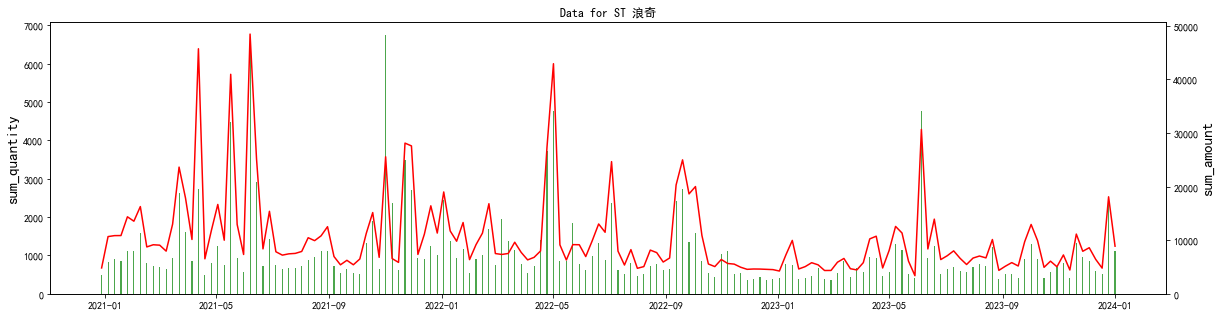

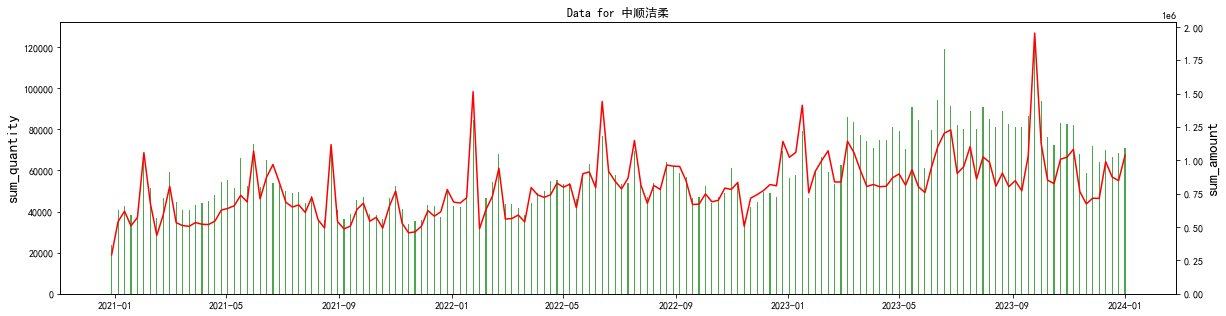

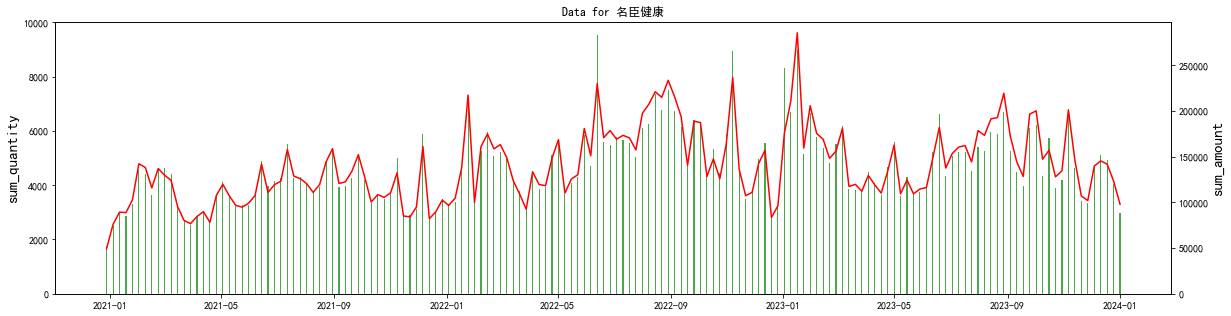

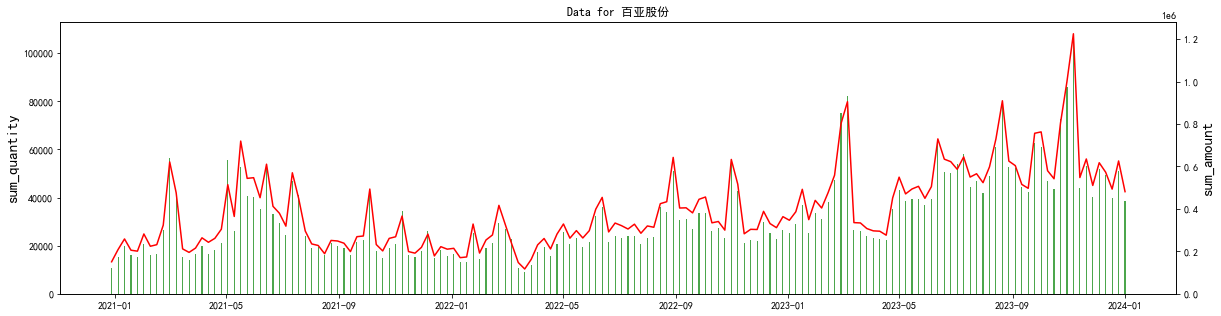

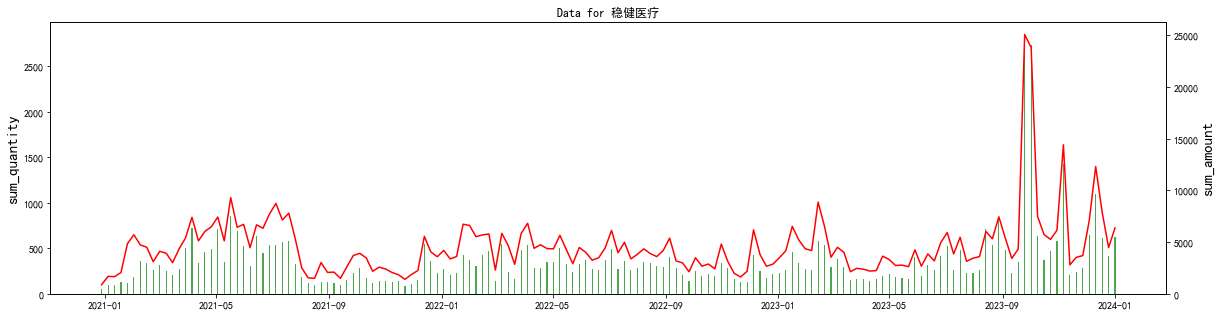

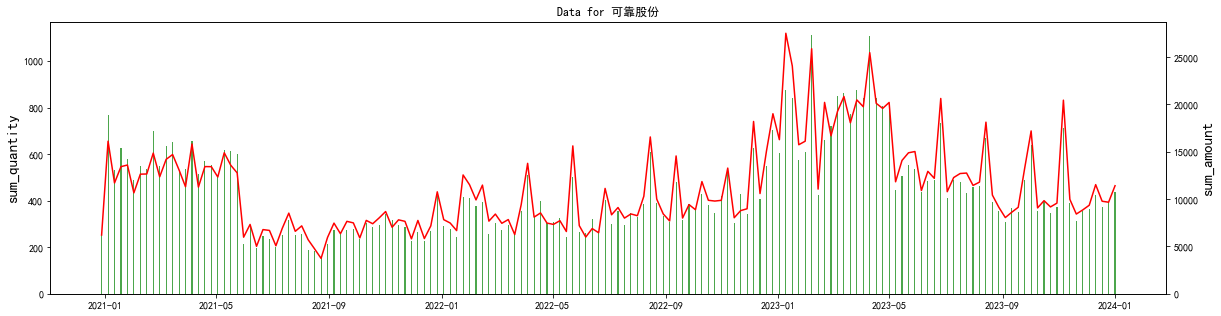

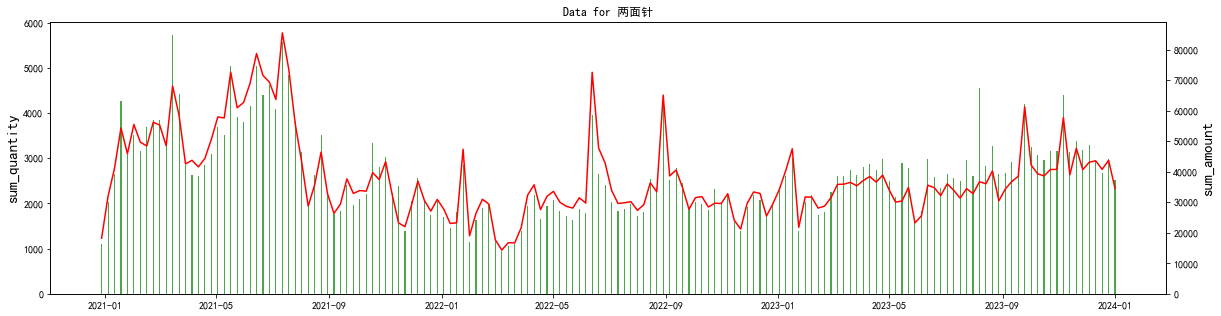

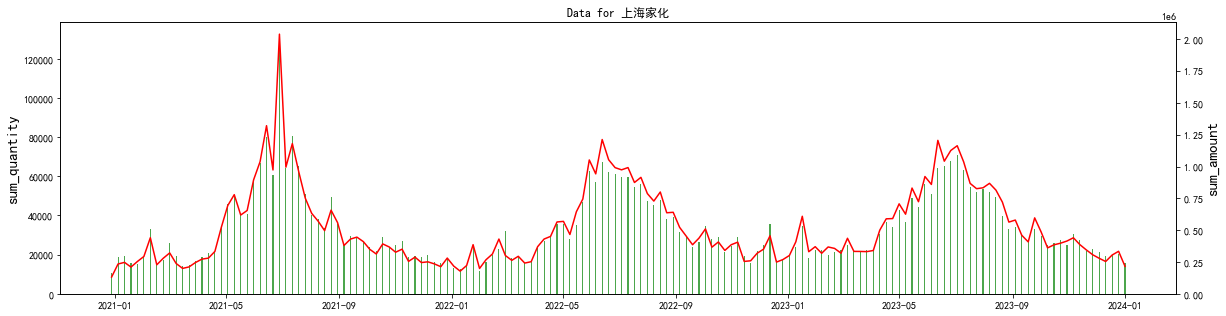

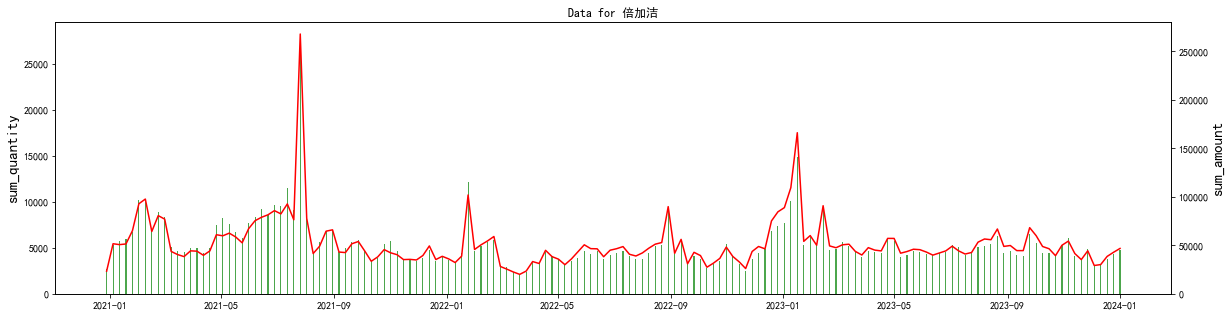

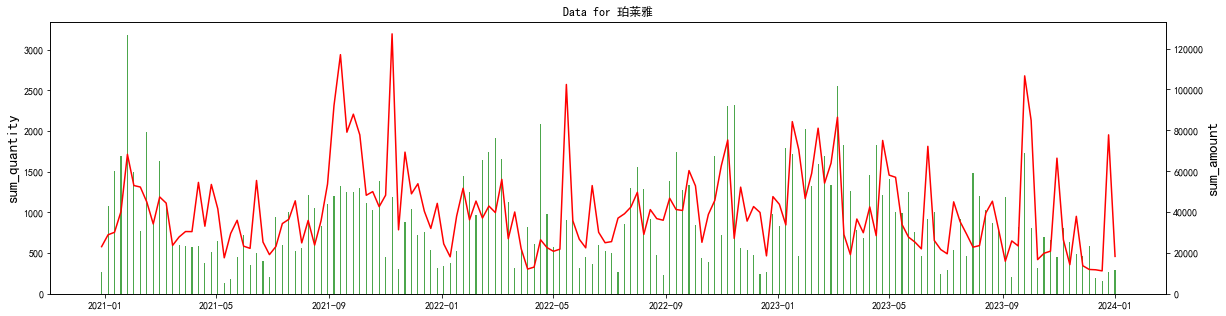

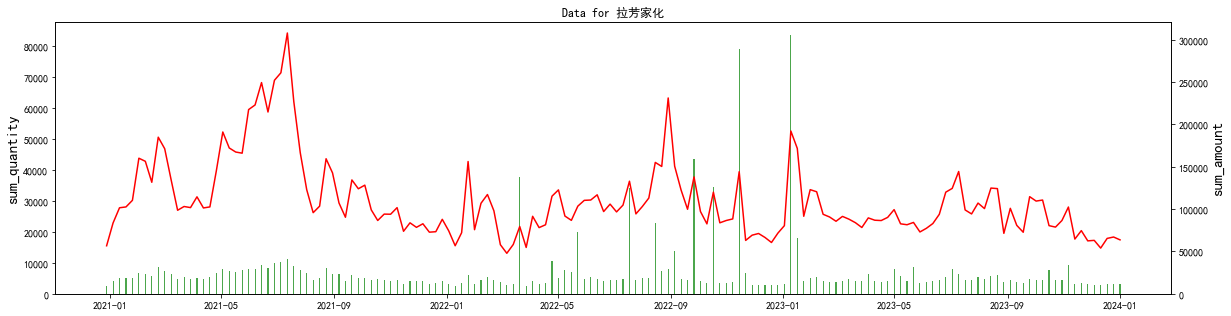

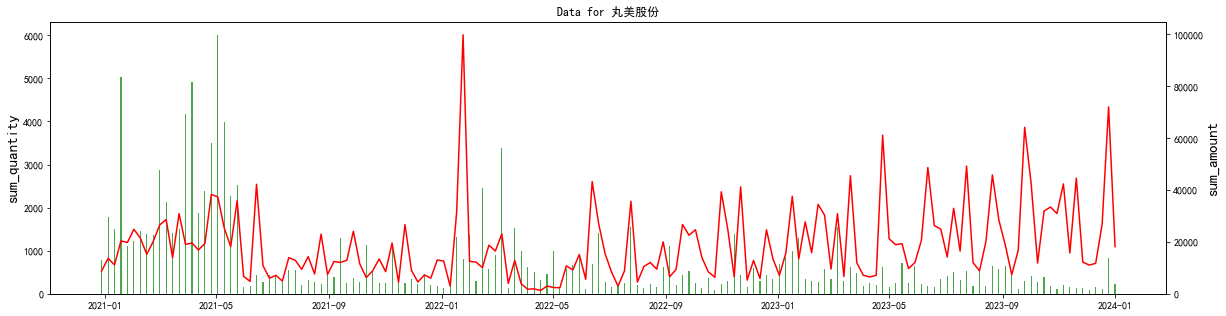

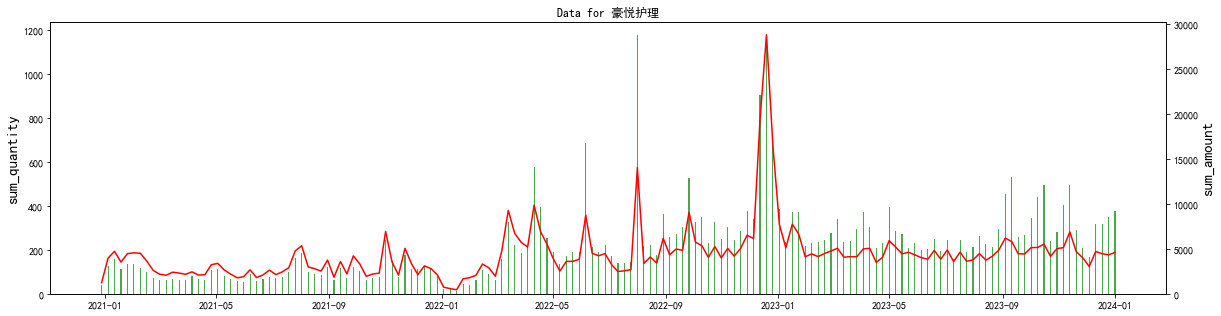

In [10]:
import seaborn as sns
shortnames = df['shortname'].unique()

for shortname in shortnames:
    symbol_data = df[df['shortname'] == shortname]
    plt.rcParams['figure.figsize'] = (20,5)
    fig = plt.figure()
    #画柱形图
    ax1 = fig.add_subplot(111)
    ax1.bar(symbol_data.to_numpy().T[1], symbol_data.to_numpy().T[5],label='sum_quantity',alpha=.7,color='g',width=1.2)
    ax1.set_ylabel('sum_quantity',fontsize='15')
    #ax1.set_title('数据统计',fontsize='20')
    #画折线图
    ax2 = ax1.twinx() #组合图必须加这个
    ax2.plot(symbol_data.to_numpy().T[1], symbol_data.to_numpy().T[4], label='sum_amount',color= 'r')
    ax2.set_ylabel('sum_amount',fontsize='15')
    ax2.set_ylim(bottom=0)
#     plt.subplots_adjust(wspace=0.3) 
    plt.title(f'Data for {shortname}')
    plt.xlabel('week_start_day')
    plt.xticks(rotation=45)
    plt.show()
    

# 添加门店信息

In [11]:
shop=pd.read_excel('门店个数.xlsx')
shop

week_start_day  count_ep  count_shop    sum_area
0       2020-12-28        61        1959  1785231.25
1       2021-01-04        63        1984  1834909.25
2       2021-01-11        62        1989  1844122.25
3       2021-01-18        62        2001  1855153.25
4       2021-01-25        62        2013  1861787.25
..             ...       ...         ...         ...
153     2023-12-04        81        2723  2810535.38
154     2023-12-11        80        2701  2781926.37
155     2023-12-18        77        2663  2804205.48
156     2023-12-25        72        2622  2698502.46
157     2024-01-01        72        2612  2716393.10

[158 rows x 4 columns]

In [12]:
df_avg=pd.merge(left=df, right=shop, left_on='week_start_day', right_on='week_start_day', how='left')

df_avg['area_sum_amount']=df_avg['sum_amount']/df_avg['sum_area']
df_avg['area_sum_quantity']=df_avg['sum_quantity']/df_avg['sum_area']
df_avg['area_sum_bill']=df_avg['sum_bill']/df_avg['sum_area']
df_avg

symbol week_start_day shortname  week_of_year  sum_amount  sum_quantity  \
0        523     2020-12-28     ST 浪奇            53     4824.49           484   
1        523     2021-01-04     ST 浪奇             1    10674.61           828   
2        523     2021-01-11     ST 浪奇             2    10852.48           909   
3        523     2021-01-18     ST 浪奇             3    10865.25           847   
4        523     2021-01-25     ST 浪奇             4    14364.84          1122   
...      ...            ...       ...           ...         ...           ...   
2049  605009     2023-12-04      豪悦护理            49     3033.20           167   
2050  605009     2023-12-11      豪悦护理            50     4698.45           319   
2051  605009     2023-12-18      豪悦护理            51     4461.41           316   
2052  605009     2023-12-25      豪悦护理            52     4330.98           348   
2053  605009     2024-01-01      豪悦护理             1     4602.60           375   

      sum_bill  count_ep  count_shop    sum_area  area_sum_amount  \
0          400        61        1959  1785231.25         0.002702   
1          710        63        1984  1834909.25         0.005818   
2          771        62        1989  1844122.25         0.005885   
3          754        62        2001  1855153.25         0.005857   
4          905        62        2013  1861787.25         0.007716   
...        ...       ...         ...         ...              ...   
2049       124        81        2723  2810535.38         0.001079   
2050       173        80        2701  2781926.37         0.001689   
2051       189        77        2663  2804205.48         0.001591   
2052       204        72        2622  2698502.46         0.001605   
2053       228        72        2612  2716393.10         0.001694   

      area_sum_quantity  area_sum_bill  
0              0.000271       0.000224  
1              0.000451       0.000387  
2              0.000493       0.000418  
3              0.000457       0.000406  
4              0.000603       0.000486  
...                 ...            ...  
2049           0.000059       0.000044  
2050           0.000115       0.000062  
2051           0.000113       0.000067  
2052           0.000129       0.000076  
2053           0.000138       0.000084  

[2054 rows x 13 columns]

In [13]:
df_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   symbol             2054 non-null   int64         
 1   week_start_day     2054 non-null   datetime64[ns]
 2   shortname          2054 non-null   object        
 3   week_of_year       2054 non-null   int64         
 4   sum_amount         2054 non-null   float64       
 5   sum_quantity       2054 non-null   int64         
 6   sum_bill           2054 non-null   int64         
 7   count_ep           2054 non-null   int64         
 8   count_shop         2054 non-null   int64         
 9   sum_area           2054 non-null   float64       
 10  area_sum_amount    2054 non-null   float64       
 11  area_sum_quantity  2054 non-null   float64       
 12  area_sum_bill      2054 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(6), object(1)
memory us

# 环比

In [14]:
df_avg

symbol week_start_day shortname  week_of_year  sum_amount  sum_quantity  \
0        523     2020-12-28     ST 浪奇            53     4824.49           484   
1        523     2021-01-04     ST 浪奇             1    10674.61           828   
2        523     2021-01-11     ST 浪奇             2    10852.48           909   
3        523     2021-01-18     ST 浪奇             3    10865.25           847   
4        523     2021-01-25     ST 浪奇             4    14364.84          1122   
...      ...            ...       ...           ...         ...           ...   
2049  605009     2023-12-04      豪悦护理            49     3033.20           167   
2050  605009     2023-12-11      豪悦护理            50     4698.45           319   
2051  605009     2023-12-18      豪悦护理            51     4461.41           316   
2052  605009     2023-12-25      豪悦护理            52     4330.98           348   
2053  605009     2024-01-01      豪悦护理             1     4602.60           375   

      sum_bill  count_ep  count_shop    sum_area  area_sum_amount  \
0          400        61        1959  1785231.25         0.002702   
1          710        63        1984  1834909.25         0.005818   
2          771        62        1989  1844122.25         0.005885   
3          754        62        2001  1855153.25         0.005857   
4          905        62        2013  1861787.25         0.007716   
...        ...       ...         ...         ...              ...   
2049       124        81        2723  2810535.38         0.001079   
2050       173        80        2701  2781926.37         0.001689   
2051       189        77        2663  2804205.48         0.001591   
2052       204        72        2622  2698502.46         0.001605   
2053       228        72        2612  2716393.10         0.001694   

      area_sum_quantity  area_sum_bill  
0              0.000271       0.000224  
1              0.000451       0.000387  
2              0.000493       0.000418  
3              0.000457       0.000406  
4              0.000603       0.000486  
...                 ...            ...  
2049           0.000059       0.000044  
2050           0.000115       0.000062  
2051           0.000113       0.000067  
2052           0.000129       0.000076  
2053           0.000138       0.000084  

[2054 rows x 13 columns]

In [15]:
def ratio(df,list_column):
    for column in list_column:
        column_name=column+'_ratio'
        df[column_name]=(df[column]-df[column].shift(1))/df[column].shift(1)

In [16]:
shortnames = df_avg['shortname'].unique()
data_final=pd.DataFrame()
for shortname in shortnames:
    symbol_data = df_avg[df_avg['shortname'] == shortname]
    ratio(symbol_data,['area_sum_amount', 'area_sum_quantity', 'area_sum_bill'])
    symbol_data=symbol_data.dropna()
    data_final=pd.concat([data_final, symbol_data], ignore_index=True)
data_final

symbol week_start_day shortname  week_of_year  sum_amount  sum_quantity  \
0        523     2021-01-04     ST 浪奇             1    10674.61           828   
1        523     2021-01-11     ST 浪奇             2    10852.48           909   
2        523     2021-01-18     ST 浪奇             3    10865.25           847   
3        523     2021-01-25     ST 浪奇             4    14364.84          1122   
4        523     2021-02-01     ST 浪奇             5    13542.09          1123   
...      ...            ...       ...           ...         ...           ...   
2036  605009     2023-12-04      豪悦护理            49     3033.20           167   
2037  605009     2023-12-11      豪悦护理            50     4698.45           319   
2038  605009     2023-12-18      豪悦护理            51     4461.41           316   
2039  605009     2023-12-25      豪悦护理            52     4330.98           348   
2040  605009     2024-01-01      豪悦护理             1     4602.60           375   

      sum_bill  count_ep  count_shop    sum_area  area_sum_amount  \
0          710        63        1984  1834909.25         0.005818   
1          771        62        1989  1844122.25         0.005885   
2          754        62        2001  1855153.25         0.005857   
3          905        62        2013  1861787.25         0.007716   
4          982        62        1979  1825671.67         0.007418   
...        ...       ...         ...         ...              ...   
2036       124        81        2723  2810535.38         0.001079   
2037       173        80        2701  2781926.37         0.001689   
2038       189        77        2663  2804205.48         0.001591   
2039       204        72        2622  2698502.46         0.001605   
2040       228        72        2612  2716393.10         0.001694   

      area_sum_quantity  area_sum_bill  area_sum_amount_ratio  \
0              0.000451       0.000387               1.152685   
1              0.000493       0.000418               0.011584   
2              0.000457       0.000406              -0.004776   
3              0.000603       0.000486               0.317379   
4              0.000615       0.000538              -0.038626   
...                 ...            ...                    ...   
2036           0.000059       0.000044              -0.198947   
2037           0.000115       0.000062               0.564937   
2038           0.000113       0.000067              -0.057995   
2039           0.000129       0.000076               0.008791   
2040           0.000138       0.000084               0.055716   

      area_sum_quantity_ratio  area_sum_bill_ratio  
0                    0.664427             0.726944  
1                    0.092341             0.080490  
2                   -0.073747            -0.027864  
3                    0.319955             0.195988  
4                    0.020691             0.106548  
...                       ...                  ...  
2036                -0.150542            -0.101418  
2037                 0.929824             0.409509  
2038                -0.017275             0.083806  
2039                 0.144403             0.121645  
2040                 0.070489             0.110286  

[2041 rows x 16 columns]

In [17]:
data_final.to_excel('美容护理周度_avg.xlsx',index=False)

# 平稳性检验

In [18]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
def adf_result(data):
    # 对时间序列进行ADF测试
    result = adfuller(data)
    # 输出结果转化为DataFrame
    output_results = pd.DataFrame({
        'ADF Statistic': [result[0]],
        'P-Value': [result[1]],
        'Lags': [result[2]],
        'Observations': [result[3]]
    })

    # 添加临界值
    critical_values = result[4]
    for key, value in critical_values.items():
        output_results[f'{key}% Critical Value'] = value
    
    return output_results

In [19]:
data_final.columns

Index(['symbol', 'week_start_day', 'shortname', 'week_of_year', 'sum_amount',
       'sum_quantity', 'sum_bill', 'count_ep', 'count_shop', 'sum_area',
       'area_sum_amount', 'area_sum_quantity', 'area_sum_bill',
       'area_sum_amount_ratio', 'area_sum_quantity_ratio',
       'area_sum_bill_ratio'],
      dtype='object')

In [21]:
shortnames = data_final['shortname'].unique()
name=[]
for i in ['sum_amount','sum_quantity', 'sum_bill',
       'area_sum_amount', 'area_sum_quantity', 'area_sum_bill',
        'area_sum_amount_ratio', 'area_sum_quantity_ratio', 'area_sum_bill_ratio']:
    print(i)
    
    adf_data=pd.DataFrame()
    for shortname in shortnames:     
        symbol_data = data_final[data_final['shortname'] == shortname]
        result=adf_result(symbol_data[i])
        result['name']=shortname
        adf_data=pd.concat([adf_data, result], ignore_index=True)
    print(adf_data)
    # 筛选出'P-Value'小于0.05的行
    filtered_data = adf_data[adf_data['P-Value'] < 0.05]
    # 获取筛选后的'name'列
    names = filtered_data['name'].to_list()
    name.append(names)
    print("------------------------------------------------------------")
    print('\n')

sum_amount
    ADF Statistic       P-Value  Lags  Observations  1%% Critical Value  \
0       -3.856103  2.382738e-03     4           152           -3.474121   
1       -2.699269  7.416493e-02     4           152           -3.474121   
2       -3.312773  1.431707e-02     3           153           -3.473830   
3       -2.667714  7.979379e-02     3           153           -3.473830   
4       -3.310351  1.442207e-02     6           150           -3.474715   
5       -1.970075  2.998465e-01     4           152           -3.474121   
6       -3.534100  7.153318e-03     1           155           -3.473259   
7       -2.762684  6.380497e-02     3           153           -3.473830   
8       -3.702568  4.077179e-03     3           153           -3.473830   
9       -8.941174  9.244637e-15     0           156           -3.472979   
10      -4.314124  4.198496e-04     0           156           -3.472979   
11      -3.642695  4.995330e-03     4           152           -3.474121   
12      -5.757

    ADF Statistic   P-Value  Lags  Observations  1%% Critical Value  \
0       -1.982346  0.294367     8           148           -3.475325   
1       -3.432882  0.009888     3           153           -3.473830   
2       -1.655892  0.453970     9           147           -3.475637   
3       -1.848919  0.356459     4           152           -3.474121   
4       -2.878890  0.047858     6           150           -3.474715   
5       -3.039050  0.031405     2           154           -3.473543   
6       -3.013969  0.033610     3           153           -3.473830   
7       -4.321664  0.000407     7           149           -3.475018   
8       -4.594316  0.000132     2           154           -3.473543   
9       -3.633595  0.005150     1           155           -3.473259   
10      -2.246161  0.189920     2           154           -3.473543   
11      -2.931371  0.041820     2           154           -3.473543   
12      -2.990964  0.035747     3           153           -3.473830   

    5

In [22]:
# 初始化一个空集合，用于存储所有子列表的交集元素
common_elements = set()

# 遍历所有子列表
for sublist in name:
    # 对每个子列表进行去重，转换为集合
    sublist_set = set(sublist)
    # 将当前子列表的元素添加到交集集合中
    common_elements |= sublist_set

# 交集集合中的元素就是每个子列表都包含的元素
common_elements = common_elements.intersection(*name)

print(common_elements)

set()


In [23]:
for shortname in common_elements:
    symbol_data = data_final[data_final['shortname'] == shortname]
    plt.rcParams['figure.figsize'] = (20,5)
    fig = plt.figure()
    #画柱形图
    ax1 = fig.add_subplot(111)
    ax1.bar(symbol_data.to_numpy().T[1], symbol_data.to_numpy().T[5],label='sum_quantity',alpha=.7,color='g',width=1.2)
    ax1.set_ylabel('sum_quantity',fontsize='15')
    #ax1.set_title('数据统计',fontsize='20')
    #画折线图
    ax2 = ax1.twinx() #组合图必须加这个
    ax2.plot(symbol_data.to_numpy().T[1], symbol_data.to_numpy().T[4], label='sum_amount',color= 'r')
    ax2.set_ylabel('sum_amount',fontsize='15')
    ax2.set_ylim(bottom=0)
#     plt.subplots_adjust(wspace=0.3) 
    plt.title(f'Data for {shortname}')
    plt.xlabel('week_start_day')
    plt.xticks(rotation=45)
    plt.show()